In [1]:
#import packages
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import cohen_kappa_score

We used the same procedure for all subsets. Therefore, only one file is uploaded. 

In [2]:
#importing the csv file, zonder trouw_col
data = pd.read_csv('df3.csv', sep=',')

In [3]:
#extra column is inserted, you don't want that, remove the column
del data['Unnamed: 0']

In [4]:
data.head()

,ID,trouw_don,NrPreviousDonations,Gender,AgeDISParticipation,Work_hours,v12_a,v12_b,v12_c,v12_d,...,v47,v46,v48,v52mgz,v52_g,v52_h,v52_i,v52sg,v61_0,v60_0
0,3,1,49,1,46,12,0,0,0,0,...,11,18,1,0,0,0,0,1,0,0
1,4,1,29,2,38,30,1,0,0,0,...,18,26,0,0,0,0,0,0,1,0
2,7,1,110,1,69,32,1,0,0,0,...,19,27,0,0,0,0,0,0,1,0
3,8,1,16,2,61,60,0,0,0,0,...,19,25,0,0,0,0,0,0,0,0
4,9,1,42,1,59,40,0,0,1,0,...,17,28,1,1,0,0,0,2,0,0


## Splitting data

In [5]:
from sklearn.cross_validation import train_test_split, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree

/usr/lib/python3/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
#split data from labels
y = data.loc[:,('trouw_don')]
X = data.loc[:,('NrPreviousDonations', 'Gender', 'AgeDISParticipation',
        'Work_hours', 'v12_a', 'v12_b', 'v12_c', 'v12_d',
       'D2_v13', 'D2_v15', 'D2_v16_1', 'D2_v16_2', 'D2_v16_3', 'D2_v16_4',
       'D2_v16_5', 'D2_v16_6', 'D2_v16_7', 'D2_v16_8', 'D2_v16_9',
       'D2_v16_10', 'D2_v16_11', 'D2_v16_12', 'v20cog', 'v20af', 'v21_int',
       'v20ses', 'v21_sn', 'v21_mn', 'v29_1', 'v40_1', 'v47', 'v46', 'v48',
       'v52mgz', 'v52_g', 'v52_h', 'v52_i', 'v52sg', 'v61_0', 'v60_0')]

In [7]:
#make a testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y)

In [8]:
len(y), len(y_train), len(y_test)

(12859, 9001, 3858)

## Dummy

In [8]:
from sklearn.dummy import DummyClassifier
clf2 = DummyClassifier(strategy='most_frequent', random_state=0)
clf2.fit(X_train, y_train)
DummyClassifier(constant=None, random_state=0, strategy='most_frequent')
clf2.score(X_test, y_test)  

0.79548989113530322

## Decision tree

In [ ]:
from sklearn.model_selection import GridSearchCV

In [9]:
param_grid = {"criterion": ["gini", "entropy"],
             "min_samples_split": [2, 10, 20],
             "max_depth":[None, 2, 5, 10],
             "min_samples_leaf":[2, 5, 10],
             "max_leaf_nodes": [None],
             "random_state": [100]
             }

clf = GridSearchCV(DecisionTreeClassifier(), param_grid, n_jobs=4)
clf.fit(X=X_train, y=y_train)

print(clf.best_score_, clf.best_params_)

0.811243195201 {'min_samples_leaf': 2, 'criterion': 'gini', 'random_state': 100, 'max_leaf_nodes': None, 'max_depth': 5, 'min_samples_split': 2}


In [9]:
tree_model = DecisionTreeClassifier(criterion='gini', random_state=100, 
                                   max_depth=5, max_leaf_nodes=None, min_samples_leaf=10,
                                   min_samples_split=2)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

In [10]:
y_pred = tree_model.predict(X_test)
print(y_pred)

[1 1 1 ..., 1 1 1]


In [11]:
scores = cross_val_score(tree_model, X, y, cv=10)
print(scores)

[ 0.81973582  0.81415241  0.81648523  0.82037325  0.81415241  0.81415241
  0.80870918  0.81726283  0.81945525  0.80933852]


In [12]:
print("Accuracy is", accuracy_score(y_test, y_pred)*100)
print("Average fold accuracy is", np.mean(scores)*100)


Accuracy is 81.1819595645
Average fold accuracy is 81.538173079


In [15]:
aucdt = roc_auc_score(y_test,y_pred, average='macro', sample_weight=None)

In [18]:
## formula for CM


import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

labels = np.unique(y_test)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[ 0.18504436  0.81495564]
 [ 0.02704464  0.97295536]]


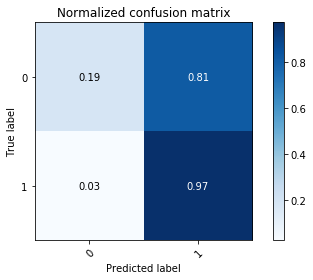

In [19]:
#with normalization
plot_confusion_matrix(y_test, y_pred, labels, normalize=True)
#percentages!

# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
model = LogisticRegression()
model = model.fit(X_train,y_train)
predslog = model.predict(X_test)
auclog = roc_auc_score(y_test,predslog, average='macro', sample_weight=None)

In [21]:
print("Accuracy is", accuracy_score(y_test, predslog)*100)

Accuracy is 79.678589943


In [20]:
cohen_score = cohen_kappa_score(y_test, predslog)
cohen_score

0.074267145582702754

Normalized confusion matrix
[[ 0.06590621  0.93409379]
 [ 0.01531443  0.98468557]]


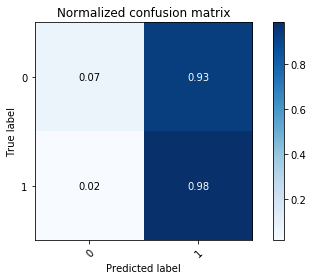

In [22]:
#with normalization
plot_confusion_matrix(y_test, predslog, labels, normalize=True)
#percentages!

## Perceptron

In [23]:
from sklearn.linear_model import Perceptron
modelper = Perceptron()
modelper = modelper.fit(X_train,y_train)
predsper = modelper.predict(X_test)
aucper = roc_auc_score(y_test,predsper, average='macro', sample_weight=None)

In [24]:
print("Accuracy is", accuracy_score(y_test, predsper)*100)

Accuracy is 79.6267496112


In [25]:
cohen_score = cohen_kappa_score(y_test, predsper)
cohen_score

0.023549664114438817

Normalized confusion matrix
[[ 0.01901141  0.98098859]
 [ 0.00391007  0.99608993]]


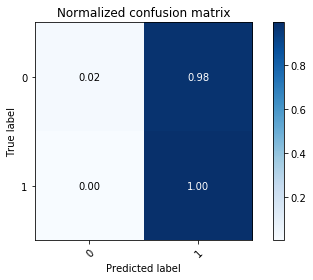

In [26]:
#with normalization
plot_confusion_matrix(y_test, predsper, labels, normalize=True)
#percentages!

## SVM

In [27]:
#scaler, to make it faster
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
modelsvm = SVC(kernel='linear')
modelsvm = modelsvm.fit(X_train,y_train)
predssvm = modelsvm.predict(X_test)
aucsvm = roc_auc_score(y_test,predssvm, average='macro', sample_weight=None)

In [29]:
print("Accuracy is", accuracy_score(y_test, predssvm)*100)

Accuracy is 79.2897874546


In [30]:
cohen_score = cohen_kappa_score(y_test, predssvm)
cohen_score

0.012474843680021164

Normalized confusion matrix
[[ 0.01520913  0.98479087]
 [ 0.00716846  0.99283154]]


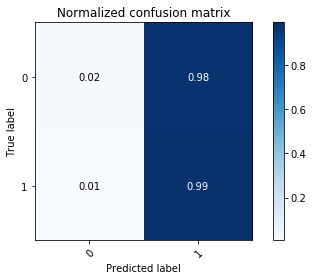

In [31]:
#with normalization
plot_confusion_matrix(y_test, predssvm, labels, normalize=True)
#percentages!

## Plot

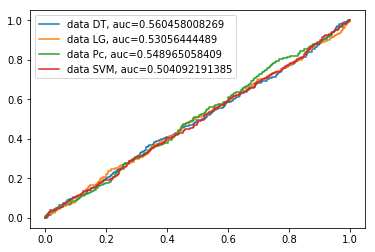

In [29]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()

pred = np.random.rand(1000)
label = np.random.randint(2, size=1000)
fpr, tpr, thresh = metrics.roc_curve(label, pred)
auc = metrics.roc_auc_score(label, pred)
plt.plot(fpr,tpr,label="data DT, auc="+str(aucdt))

pred = np.random.rand(1000)
label = np.random.randint(2, size=1000)
fpr, tpr, thresh = metrics.roc_curve(label, pred)
auc = metrics.roc_auc_score(label, pred)
plt.plot(fpr,tpr,label="data LR, auc="+str(auclog))

pred = np.random.rand(1000)
label = np.random.randint(2, size=1000)
fpr, tpr, thresh = metrics.roc_curve(label, pred)
auc = metrics.roc_auc_score(label, pred)
plt.plot(fpr,tpr,label="data Pc, auc="+str(aucper))

pred = np.random.rand(1000)
label = np.random.randint(2, size=1000)
fpr, tpr, thresh = metrics.roc_curve(label, pred)
auc = metrics.roc_auc_score(label, pred)
plt.plot(fpr,tpr,label="data SVM, auc="+str(aucsvm))

plt.legend(loc=0)
plt.show()

In [52]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [50]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier(criterion='gini', random_state=100, 
                                   max_depth=5, max_leaf_nodes=None, min_samples_leaf=10,
                                   min_samples_split=2)))
models.append(('Perceptron', Perceptron()))
models.append(('SVM', SVC(kernel='linear')))



In [54]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.797963 (0.012784)
DT: 0.815538 (0.011088)
Perceptron: 0.788627 (0.020440)
SVM: 0.795630 (0.013231)


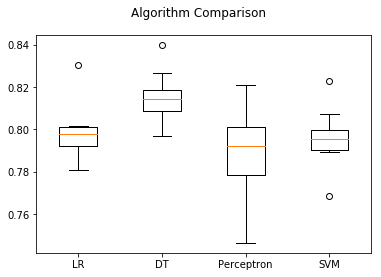

In [55]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()